# Time Series Demonstration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Converting to Datetime Type

In [2]:
# We get a Timestamp object
pd.to_datetime('Jan 1 1970') 

Timestamp('1970-01-01 00:00:00')

In [3]:
# Obtain the current timestamp
pd.to_datetime('now') 

Timestamp('2020-10-27 16:31:26.887527')

In [4]:
# Non-standard format using ":", pandas may not be able to understand what it means right away
# Uncomment the code below to cause a "Unknown string format" error

# pd.to_datetime('Jan:1:1970') 

In [5]:
# Same data as before, but now we use the format keyword argument that contains format specifiers
# Can significantly speed up performance b/c pandas does not need to check multiple format types to infer the correct format
pd.to_datetime('Jan:1:1970', format='%b:%d:%Y') 

Timestamp('1970-01-01 00:00:00')

In [6]:
df = pd.read_csv('https://gist.githubusercontent.com/zgulde/c60209f379155744ced4dfc57068e55b/raw/97fc3ab1e2f6fff6ffd409d60029c53954d5784e/coffee_consumption.csv')

In [7]:
# Two columns: Date (but not stored as a Datetime object)
df.dtypes

date                   object
coffee_consumption    float64
dtype: object

In [8]:
# Date is formatted as YYYY-MM-DD
# Some days are missing (01-05, 01-06)
df.head()

,date,coffee_consumption
0,2019-01-01,14.301915
1,2019-01-02,12.905900
2,2019-01-03,10.046015
3,2019-01-04,6.354805
4,2019-01-07,8.545563


In [9]:
# convert our date column to datetime type
df.date = pd.to_datetime(df.date)
df.dtypes

date                  datetime64[ns]
coffee_consumption           float64
dtype: object

## Working with DateTime Series

In [10]:
df.date

0     2019-01-01
1     2019-01-02
2     2019-01-03
3     2019-01-04
4     2019-01-07
         ...    
256   2019-12-25
257   2019-12-26
258   2019-12-27
259   2019-12-30
260   2019-12-31
Name: date, Length: 261, dtype: datetime64[ns]

In [11]:
# Getting the day of the month out of the data
df.date.dt.day

0       1
1       2
2       3
3       4
4       7
       ..
256    25
257    26
258    27
259    30
260    31
Name: date, Length: 261, dtype: int64

In [12]:
# Like .str is for string methods, .dt is for datetime methods
# As some examples, we can pull components of the date out of the datetime column
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month
df['day'] = df.date.dt.day
df['weekday'] = df.date.dt.day_name()
df.head()

,date,coffee_consumption,year,month,day,weekday
0,2019-01-01,14.301915,2019,1,1,Tuesday
1,2019-01-02,12.905900,2019,1,2,Wednesday
2,2019-01-03,10.046015,2019,1,3,Thursday
3,2019-01-04,6.354805,2019,1,4,Friday
4,2019-01-07,8.545563,2019,1,7,Monday


In [13]:
df.weekday.value_counts() # No Saturdays or Sundays

Tuesday      53
Friday       52
Monday       52
Thursday     52
Wednesday    52
Name: weekday, dtype: int64

In [14]:
df.month.value_counts()

10    23
7     23
5     23
1     23
12    22
8     22
4     22
11    21
9     21
3     21
6     20
2     20
Name: month, dtype: int64

Date is a datetime, but the year/month/day/weekday can be treated as categorical features. We can groupby and take the average, or use them as categorical features in visualizations. 

In [15]:
# cleanup demonstration columns
del df['year']
del df['day']
del df['month']
del df['weekday']

In [16]:
df.head()

,date,coffee_consumption
0,2019-01-01,14.301915
1,2019-01-02,12.905900
2,2019-01-03,10.046015
3,2019-01-04,6.354805
4,2019-01-07,8.545563


## DateTime Indexes

In [17]:
# Often we want the dates to be the index of our dataframe
df = df.set_index('date').sort_index() #.sort_index() is SUPER IMPORTANT for future analysis
df

,coffee_consumption
date,
2019-01-01,14.301915
2019-01-02,12.905900
2019-01-03,10.046015
2019-01-04,6.354805
2019-01-07,8.545563
...,...
2019-12-25,12.250875
2019-12-26,7.513206
2019-12-27,9.464345


When pandas has datetime as the index, we can do a lot of cool stuff. 

In [18]:
# Where does our data start and where does it end?
df.index.min(), df.index.max()

(Timestamp('2019-01-01 00:00:00'), Timestamp('2019-12-31 00:00:00'))

In [19]:
#When we have a datetime index, pandas will read this and will return all the data from the month of May
df['2019-05']

,coffee_consumption
date,
2019-05-01,9.970773
2019-05-02,8.755956
2019-05-03,7.790948
2019-05-06,13.196664
2019-05-07,11.725856
2019-05-08,8.495455
2019-05-09,11.407965
2019-05-10,11.344190
2019-05-13,9.517543


In [20]:
# We can take it a step further and define a slice of data
df['2019-05-06':'2019-05-16'] # NB. inclusive (the end date will be included in the DataFrame)

,coffee_consumption
date,
2019-05-06,13.196664
2019-05-07,11.725856
2019-05-08,8.495455
2019-05-09,11.407965
2019-05-10,11.344190
2019-05-13,9.517543
2019-05-14,6.220478
2019-05-15,12.743796
2019-05-16,9.169615


In [21]:
df.index

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10',
               '2019-01-11', '2019-01-14',
               ...
               '2019-12-18', '2019-12-19', '2019-12-20', '2019-12-23',
               '2019-12-24', '2019-12-25', '2019-12-26', '2019-12-27',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', name='date', length=261, freq=None)

In [22]:
df.index.quarter

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
           dtype='int64', name='date', length=261)

In [23]:
df.index.day

Int64Index([ 1,  2,  3,  4,  7,  8,  9, 10, 11, 14,
            ...
            18, 19, 20, 23, 24, 25, 26, 27, 30, 31],
           dtype='int64', name='date', length=261)

In [24]:
df.index.month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='date', length=261)

## Changing the Period

Vocab: **upsampling** and **downsampling**

- upsample: smaller time window == more data points, e.g. daily -> hourly
- downsampling: larger time window == fewer data points, e.g. daily -> weekly

In [25]:
df.head(10) #Often times we want a uniform frequency between observations and the real data does not have a uniform frequency

,coffee_consumption
date,
2019-01-01,14.301915
2019-01-02,12.905900
2019-01-03,10.046015
2019-01-04,6.354805
2019-01-07,8.545563
2019-01-08,9.410101
2019-01-09,7.219271
2019-01-10,9.338456
2019-01-11,11.872667


In [26]:
df.shape

(261, 1)

In [27]:
by_day = df.asfreq('D') # Different strings will create different frequencies ('W' - weekly)
by_day

,coffee_consumption
date,
2019-01-01,14.301915
2019-01-02,12.905900
2019-01-03,10.046015
2019-01-04,6.354805
2019-01-05,NaN
...,...
2019-12-27,9.464345
2019-12-28,NaN
2019-12-29,NaN


Notice that we introduced missing values. This is a relatively simple approach. There are more sophisticated ways of accomplishing this. For example, `.asfreq('W')` only returns the first observation in each week. It bluntly truncates the data. 

If you have uniformly distributed data (the time difference between observations are the same), you would only ever downsample if you are trying to join on a different dataset. For example, a company records labor totals by week and at the start of the year it started being collected daily. To join the new data to the old, downsampling would be required.

In [28]:
df.asfreq('D').shape # The shape of the dataframe has increased

(365, 1)

## Filling Missing Values
So we have created missing values. Now what?

In [29]:
by_day.assign(
    ffill=lambda df: df.coffee_consumption.ffill(), #Takes the value from Friday and moves it foward
    bfill=lambda df: df.coffee_consumption.bfill() #Takes the value from Monday and moves it backwards
).head(15)

,coffee_consumption,ffill,bfill
date,,,
2019-01-01,14.301915,14.301915,14.301915
2019-01-02,12.905900,12.905900,12.905900
2019-01-03,10.046015,10.046015,10.046015
2019-01-04,6.354805,6.354805,6.354805
2019-01-05,NaN,6.354805,8.545563
2019-01-06,NaN,6.354805,8.545563
2019-01-07,8.545563,8.545563,8.545563
2019-01-08,9.410101,9.410101,9.410101
2019-01-09,7.219271,7.219271,7.219271


There are fancier ways of doing filling, like methods that can interpolate the middle point between the backfilled and forwardfilled approach. 

In [30]:
df = df.asfreq('D').fillna(0) # You can also just fill the NaN's with zeroes

In [31]:
df

,coffee_consumption
date,
2019-01-01,14.301915
2019-01-02,12.905900
2019-01-03,10.046015
2019-01-04,6.354805
2019-01-05,0.000000
...,...
2019-12-27,9.464345
2019-12-28,0.000000
2019-12-29,0.000000


## Resampling
Like .groupby but for dates

In [32]:
df.resample('3W').mean() # Every 3 weeks, for all the data in that period, take the average

,coffee_consumption
date,
2019-01-06,7.268106
2019-01-27,6.960135
2019-02-17,7.753787
2019-03-10,6.723909
2019-03-31,7.901977
2019-04-21,7.301799
2019-05-12,7.208603
2019-06-02,7.894871
2019-06-23,6.851534


In [33]:
df.resample('M').sum() # Every month, take the sum

,coffee_consumption
date,
2019-01-31,233.926749
2019-02-28,206.038853
2019-03-31,219.779000
2019-04-30,222.030626
2019-05-31,248.480093
2019-06-30,183.656493
2019-07-31,248.267463
2019-08-31,224.007066
2019-09-30,215.689004


Knowing that we have missing values for weekends, how could we get a month-by-month average of total weekly coffee consumption?

We need to resample for:
- total weekly consumption

and then:
- average weekly consumption by month

In [34]:
df.resample('W').sum().resample('M').mean() # We chained resamples together (each time supplying an aggregation)

,coffee_consumption
date,
2019-01-31,47.442870
2019-02-28,52.967916
2019-03-31,51.620292
2019-04-30,50.566915
2019-05-31,52.163714
2019-06-30,48.648939
2019-07-31,52.279082
2019-08-31,53.288159
2019-09-30,50.882459


47.44 is the average amount of coffee consumed in a week in January

In [35]:
df.resample('Q').sum() #If we want to know the total amount of coffee consumed in each quarter

,coffee_consumption
date,
2019-03-31,659.744602
2019-06-30,654.167213
2019-09-30,687.963534
2019-12-31,690.659860


# Plotting

When we have a datetime index, we can call `.plot()` to get a line plot over time of the dataframe

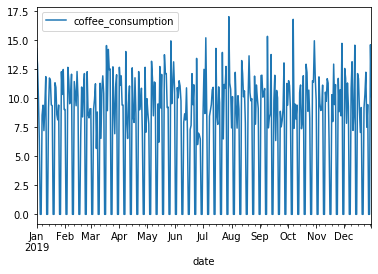

In [36]:
df.plot()

The amount keeps dropping to 0 on the weekends because we filled the na's with zeroes

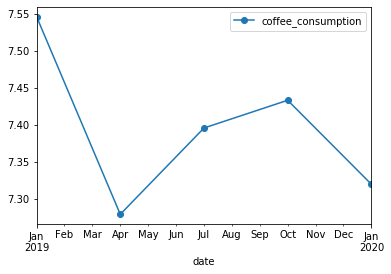

In [37]:
df.resample('3M').mean().plot(marker='o') #The average consumption for each 3 month period 

## Rolling Windows

A rolling average takes a window and moves it piece by piece to get the average. Whereas our resample just looks at the averages of each bucket. 

Rolling average is the most common, but you can also have rolling sum, etc.

,coffee_consumption,rolling_3,rolling_5,rolling_7
date,,,,
2019-01-31,7.546024,NaN,NaN,NaN
2019-02-28,7.358530,NaN,NaN,NaN
2019-03-31,7.089645,7.331400,NaN,NaN
2019-04-30,7.401021,7.283066,NaN,NaN
2019-05-31,8.015487,7.502051,7.482142,NaN
2019-06-30,6.121883,7.179464,7.197313,NaN
2019-07-31,8.008628,7.381999,7.327333,7.363031
2019-08-31,7.226034,7.118848,7.354611,7.317318
2019-09-30,7.189633,7.474765,7.312333,7.293190


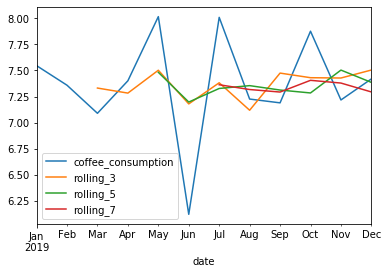

In [38]:
rolling_df = df.resample('M').mean().assign(
    rolling_3=lambda df: df.coffee_consumption.rolling(3).mean(),
    rolling_5=lambda df: df.coffee_consumption.rolling(5).mean(),
    rolling_7=lambda df: df.coffee_consumption.rolling(7).mean(),
)
rolling_df.plot()
rolling_df.head(20)

In [39]:
df.resample('W').mean().rolling(4).sum()

,coffee_consumption
date,
2019-01-06,NaN
2019-01-13,NaN
2019-01-20,NaN
2019-01-27,28.148512
2019-02-03,28.480055
2019-02-10,29.850250
2019-02-17,30.182974
2019-02-24,30.267381
2019-03-03,29.443663


In [40]:
df.resample('M').mean().rolling(4).sum()

,coffee_consumption
date,
2019-01-31,NaN
2019-02-28,NaN
2019-03-31,NaN
2019-04-30,29.395221
2019-05-31,29.864683
2019-06-30,28.628036
2019-07-31,29.547019
2019-08-31,29.372032
2019-09-30,28.546179


## Lagging and Leading

- **shift**: moves data points forwards or backwards
- **diff**: takes the difference between future or past data points

In [41]:
df['shift(-1)'] = df.coffee_consumption.shift(-1) #Takes tomorrow and puts it on today's date
df['shift(1)'] = df.coffee_consumption.shift(1) #Takes yesterdays data and puts it on today's date
df['shift(3)'] = df.coffee_consumption.shift(3) #Takes the data from three days ago and puts it on today's date
df['diff(1)'] = df.coffee_consumption.diff(1) #Looks at the difference between today and yesterday
df['diff(3)'] = df.coffee_consumption.diff(3) #Looks at the difference between today and three days ago
df.head(25)

,coffee_consumption,shift(-1),shift(1),shift(3),diff(1),diff(3)
date,,,,,,
2019-01-01,14.301915,12.905900,NaN,NaN,NaN,NaN
2019-01-02,12.905900,10.046015,14.301915,NaN,-1.396015,NaN
2019-01-03,10.046015,6.354805,12.905900,NaN,-2.859885,NaN
2019-01-04,6.354805,0.000000,10.046015,14.301915,-3.691210,-7.947110
2019-01-05,0.000000,0.000000,6.354805,12.905900,-6.354805,-12.905900
2019-01-06,0.000000,8.545563,0.000000,10.046015,0.000000,-10.046015
2019-01-07,8.545563,9.410101,0.000000,6.354805,8.545563,2.190757
2019-01-08,9.410101,7.219271,8.545563,0.000000,0.864539,9.410101
2019-01-09,7.219271,9.338456,9.410101,0.000000,-2.190831,7.219271


In [42]:
# cleanup the additional columns
for col in ['shift(-1)', 'shift(1)', 'shift(3)', 'diff(1)', 'diff(3)']:
    del df[col]

## Strftime

Makes date time data pretty for presentation to others

In [43]:
df.index.strftime('%B %d, %Y')[:4]

Index(['January 01, 2019', 'January 02, 2019', 'January 03, 2019',
       'January 04, 2019'],
      dtype='object', name='date')

In [44]:
df.index.strftime('%B the %d of %Y, during the reign of her majesty, Queen Elizabeth II')

Index(['January the 01 of 2019, during the reign of her majesty, Queen Elizabeth II',
       'January the 02 of 2019, during the reign of her majesty, Queen Elizabeth II',
       'January the 03 of 2019, during the reign of her majesty, Queen Elizabeth II',
       'January the 04 of 2019, during the reign of her majesty, Queen Elizabeth II',
       'January the 05 of 2019, during the reign of her majesty, Queen Elizabeth II',
       'January the 06 of 2019, during the reign of her majesty, Queen Elizabeth II',
       'January the 07 of 2019, during the reign of her majesty, Queen Elizabeth II',
       'January the 08 of 2019, during the reign of her majesty, Queen Elizabeth II',
       'January the 09 of 2019, during the reign of her majesty, Queen Elizabeth II',
       'January the 10 of 2019, during the reign of her majesty, Queen Elizabeth II',
       ...
       'December the 22 of 2019, during the reign of her majesty, Queen Elizabeth II',
       'December the 23 of 2019, during th

## Timedeltas

In [45]:
start_date = pd.to_datetime('20190204')
graduation_date = pd.to_datetime('20190614')

days_between = graduation_date - start_date #Subtracting one datetime object from another gives us a time delta object
days_between

Timedelta('130 days 00:00:00')

In [46]:
days_between // pd.Timedelta('1d') #Dividing a date by a timedelta gives us a single integer number

130

In [47]:
#Rather than doing a separate line of code for a difference between every date and the current date
# We can pass in the index to apply that calculation to every observation
# To do this: Take the max date, then subtract the index, this gives us how many days between that point of data and the max date
df.index.max() - df.index 

TimedeltaIndex(['364 days', '363 days', '362 days', '361 days', '360 days',
                '359 days', '358 days', '357 days', '356 days', '355 days',
                ...
                  '9 days',   '8 days',   '7 days',   '6 days',   '5 days',
                  '4 days',   '3 days',   '2 days',   '1 days',   '0 days'],
               dtype='timedelta64[ns]', name='date', length=365, freq=None)

In [48]:
# Dividing that result by the Timedelta gives the integer number of days
df['days_since_max'] = (df.index.max() - df.index) // pd.Timedelta('1d') 
df

,coffee_consumption,days_since_max
date,,
2019-01-01,14.301915,364
2019-01-02,12.905900,363
2019-01-03,10.046015,362
2019-01-04,6.354805,361
2019-01-05,0.000000,360
...,...,...
2019-12-27,9.464345,4
2019-12-28,0.000000,3
2019-12-29,0.000000,2


___

# Exercises

For all of the datasets below, examine the data types of each column, ensure that the dates are in the proper format, and set the dataframe's index to the date column as appropriate.

For this exercise you'll need to install a library that will provide us access to some more datasets:

        pip install vega_datasets

You can use this library like so:

        from vega_datasets import data
        data.sf_temps()

## PART ONE

Use the `sf_temps` for the exercises below:

In [49]:
from vega_datasets import data
df = data.sf_temps()

In [50]:
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


### EXERCISE ONE:
Resample by the day and take the average temperature. Visualize the average temperature over time.

In [51]:
# Convert the date column to be the index column
df = df.set_index('date').sort_index()

# Resampling by the day and aggregating the mean
daily_temp = df.resample('D').mean() 
daily_temp

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
...,...
2010-12-27,48.991667
2010-12-28,49.000000
2010-12-29,49.012500


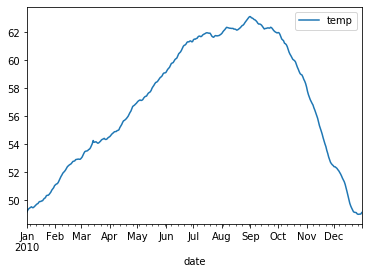

In [52]:
# Visualizing the average daily temperature
daily_temp.plot()

### EXERCISE TWO:
Write the code necessary to visualize the minimum temperature over time.

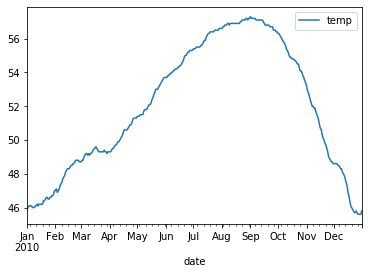

In [53]:
# Resampling for the daily minimum temperature
daily_min = df.resample('D').min()

# Plotting the daily minimum
daily_min.plot()

### EXERCISE THREE:
Write the code necessary to visualize the maximum temperature over time.

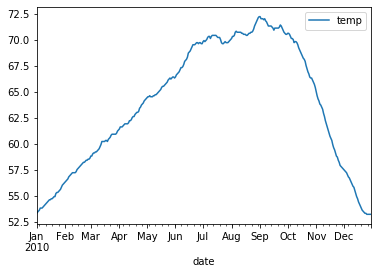

In [54]:
# Resampling for the daily minimum temperature
daily_max = df.resample('D').max()

# Plotting the daily minimum
daily_max.plot()

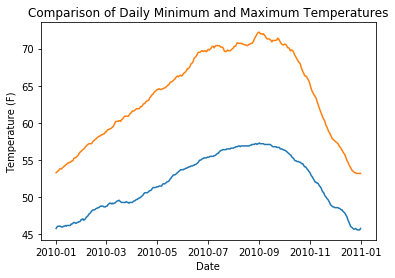

In [55]:
# Visualizing the daily minimum and daily maximum temperatures

plt.plot(daily_min)
plt.plot(daily_max)
plt.xlabel('Date')
plt.ylabel('Temperature (F)')
plt.title('Comparison of Daily Minimum and Maximum Temperatures')
plt.show()

### EXERCISE FOUR:
Which month is the coldest, on average?

In [56]:
monthly_temp = df.resample('M').mean()
monthly_temp

,temp
date,
2010-01-31,49.984140
2010-02-28,52.243899
2010-03-31,53.956528
2010-04-30,55.633056
2010-05-31,57.970968
2010-06-30,60.444722
2010-07-31,61.765457
2010-08-31,62.405376
2010-09-30,62.487083


In [57]:
print(f"The coldest month on average is {monthly_temp[['temp']].idxmin().dt.month_name()[0]}.")

The coldest month on average is January.


### EXERCISE FIVE:
Which month has the highest average temperature?

In [58]:
print(f"The hottest month on average is {monthly_temp[['temp']].idxmax().dt.month_name()[0]}.")

The hottest month on average is September.


### EXERCISE SIX:
Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [59]:
min_max = df.resample('D').agg(['min', 'max'])
min_max

temp      
             min   max
date                  
2010-01-01  45.8  53.3
2010-01-02  46.0  53.4
2010-01-03  46.1  53.5
2010-01-04  46.1  53.6
2010-01-05  46.1  53.8
...          ...   ...
2010-12-27  45.6  53.2
2010-12-28  45.6  53.2
2010-12-29  45.6  53.2
2010-12-30  45.6  53.2
2010-12-31  45.8  53.2

[365 rows x 2 columns]

In [60]:
min_max['daily_range'] = min_max['temp']['max'] - min_max['temp']['min']
min_max

temp       daily_range
             min   max            
date                              
2010-01-01  45.8  53.3         7.5
2010-01-02  46.0  53.4         7.4
2010-01-03  46.1  53.5         7.4
2010-01-04  46.1  53.6         7.5
2010-01-05  46.1  53.8         7.7
...          ...   ...         ...
2010-12-27  45.6  53.2         7.6
2010-12-28  45.6  53.2         7.6
2010-12-29  45.6  53.2         7.6
2010-12-30  45.6  53.2         7.6
2010-12-31  45.8  53.2         7.4

[365 rows x 3 columns]

In [61]:
min_max_monthly = min_max.resample('M').max()
min_max_monthly

temp       daily_range
             min   max            
date                              
2010-01-31  47.0  56.2         9.3
2010-02-28  48.8  58.6         9.9
2010-03-31  49.6  61.3        12.0
2010-04-30  51.3  64.3        13.0
2010-05-31  53.7  66.4        13.1
2010-06-30  55.3  69.7        14.8
2010-07-31  56.6  70.4        14.8
2010-08-31  57.2  72.2        15.0
2010-09-30  57.3  72.2        14.9
2010-10-31  56.3  70.6        14.4
2010-11-30  53.2  65.0        11.8
2010-12-31  48.6  57.5         8.9

In [62]:
print(f"{min_max_monthly['daily_range'].idxmax().month_name()} has the highest daily temperature variability.")

August has the highest daily temperature variability.


### BONUS:
Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

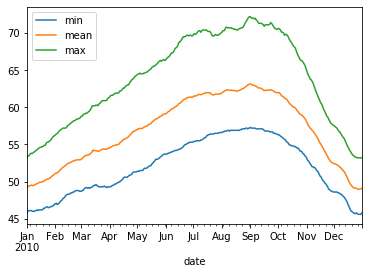

In [63]:
df.temp.resample('D').agg(['min', 'mean', 'max']).plot()

Text(0.5, 1.0, 'Temperature Changes in San Fransisco')

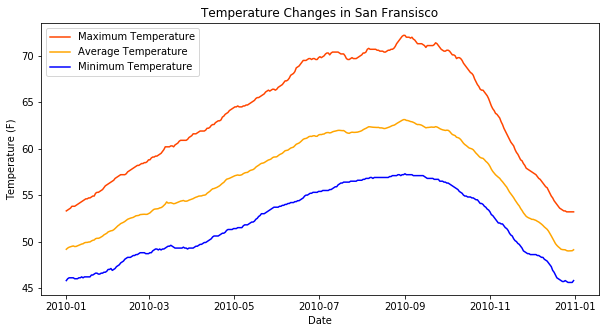

In [64]:
plt.figure(figsize=(10,5))
plt.plot(min_max['temp']['max'], label='Maximum Temperature', color = 'orangered')
plt.plot(daily_temp, label = 'Average Temperature', color = 'Orange')
plt.plot(min_max['temp']['min'], label = 'Minimum Temperature', color = 'Blue')
plt.xlabel('Date')
plt.ylabel('Temperature (F)')
plt.legend()
plt.title('Temperature Changes in San Fransisco')

___
## PART TWO
        from vega_datasets import data
        data.seattle_weather()
        
Use the dataset to answer the following questions:

In [65]:
seattle = data.seattle_weather()
seattle.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


### EXERCISE ONE:
Which year and month combination has the highest amount of precipitation?

In [66]:
# Convert the date column to be the index column
seattle = seattle.set_index('date').sort_index()

seattle_monthly_amount = seattle.resample('M').sum()
seattle_monthly_amount.head()

,precipitation,temp_max,temp_min,wind
date,,,,
2012-01-31,173.3,218.7,47.8,120.9
2012-02-29,92.3,269.0,92.9,113.2
2012-03-31,183.0,296.2,88.0,131.7
2012-04-30,68.1,446.2,179.8,101.2
2012-05-31,52.2,547.5,253.9,104.0


In [67]:
print(f'The month with the highest precipitation was {seattle_monthly_amount.precipitation.idxmax().month_name()} in the year {seattle_monthly_amount.precipitation.idxmax().year}.')
print(f'In that month total precipitation was recorded as: {round(seattle_monthly_amount.precipitation.max(), 1)}')

The month with the highest precipitation was December in the year 2015.
In that month total precipitation was recorded as: 284.5


### EXERCISE TWO:
Visualize the amount of monthly precipitation over time.

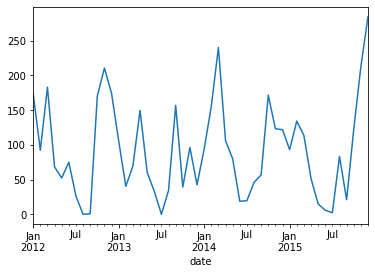

In [68]:
seattle_monthly_amount.precipitation.plot()

### EXERCISE THREE:
Visualize the amount of wind over time. Choose a time interval you think is appropriate.

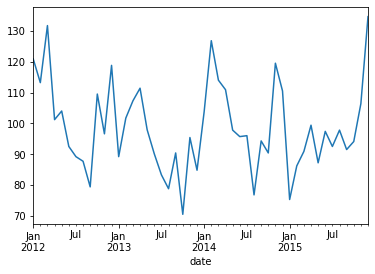

In [69]:
seattle_monthly_amount.wind.plot()

### EXERCISE FOUR:
Which year-month combination is the windiest?

In [70]:
# This is based on the sum of wind in each month, not the average
print(f'The month with the highest total wind was {seattle_monthly_amount.wind.idxmax().month_name()} in the year {seattle_monthly_amount.wind.idxmax().year}.')
print(f'In that month total wind was recorded as: {round(seattle_monthly_amount.wind.max(), 1)}')

The month with the highest total wind was December in the year 2015.
In that month total wind was recorded as: 134.6


### EXERCISE FIVE:
What's the sunniest year? (Hint: which year has the highest number of days where weather == sun?)

In [71]:
seattle['year'] = seattle.index.year
sunniest_year = seattle[seattle.weather == 'sun'].groupby('year').weather.value_counts().idxmax()[0]
most_days_sunny = seattle[seattle.weather == 'sun'].groupby('year').weather.value_counts().max()

print(f"The sunniest year was {sunniest_year}. There were {most_days_sunny} days of sun that year.")

The sunniest year was 2014. There were 211 days of sun that year.


### EXERCISE SIX:
In which month does it rain the most?

In [72]:
seattle['month'] = seattle.index.month_name()
seattle.head()

,precipitation,temp_max,temp_min,wind,weather,year,month
date,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012,January
2012-01-02,10.9,10.6,2.8,4.5,rain,2012,January
2012-01-03,0.8,11.7,7.2,2.3,rain,2012,January
2012-01-04,20.3,12.2,5.6,4.7,rain,2012,January
2012-01-05,1.3,8.9,2.8,6.1,rain,2012,January


In [73]:
seattle.month.value_counts() 

October      124
March        124
August       124
July         124
January      124
May          124
December     124
June         120
November     120
April        120
September    120
February     113
Name: month, dtype: int64

There are an unequal number of observations in each month. Simply taking the sum or even the monthly average might not get across the "intent" of this question. A longer month may have a higher sum of precipitation than a shorter month, even though it may have rained more on each day during the shorter month. Therefore, rather than using the montly sum or monthly average, we will look at the daily average within each month. 

In [74]:
seattle.groupby('month').precipitation.mean()

month
April        3.128333
August       1.320161
December     5.021774
February     3.734513
January      3.758065
July         0.388710
June         1.107500
March        4.888710
May          1.673387
November     5.354167
October      4.059677
September    1.962500
Name: precipitation, dtype: float64

In [75]:
seattle.groupby('month').precipitation.mean().idxmax()

'November'

### EXERCISE SEVEN:
Which month has the most number of days with a non-zero amount of precipitation?

In [97]:
seattle[seattle.precipitation > 0].groupby('month').precipitation.size()

month
April        59
August       22
December     81
February     73
January      66
July         11
June         37
March        73
May          34
November     71
October      61
September    35
Name: precipitation, dtype: int64

In [98]:
print(f"The moistest month is {seattle[seattle.precipitation > 0].groupby('month').precipitation.size().idxmax()}.")

The moistest month is December.


___
## PART THREE

        data.flights_20k()

In [78]:
flights = data.flights_20k()
flights.head(5)

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


### EXERCISE ONE:
Convert any negative delays to 0.

In [79]:
flights['delay'] = flights.delay.apply(lambda x: 0 if x < 0 else x)
flights.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,0,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,0,550,MSY,MCO
4,2001-03-30 21:45:00,0,229,STL,IND


### EXERCISE TWO:
Which hour of the day has the highest average delay?

In [80]:
# Convert the date column to be the index column
flights = flights.set_index('date').sort_index()

In [81]:
flights_hourly = flights.resample('H').mean()
flights_hourly['hour'] = flights_hourly.index.hour

flights_hourly.groupby('hour').delay.mean()

hour
0     124.350000
1     170.000000
2            NaN
3     302.500000
4            NaN
5       0.514706
6       2.336885
7       3.098759
8       3.941242
9       5.010369
10      5.857175
11      7.507731
12      9.373944
13     11.688910
14     10.864745
15     12.967052
16     13.630047
17     13.418065
18     14.621380
19     15.922441
20     18.290368
21     20.276163
22     31.397858
23     54.991667
Name: delay, dtype: float64

In [82]:
print(f"The hour with the highest average delay is hour {flights_hourly.groupby('hour').delay.mean().idxmax()}")

The hour with the highest average delay is hour 3


### EXERCISE THREE:
Does the day of the week make a difference in the delay amount?

In [83]:
flights.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,0,251,MDW,STL
2001-01-01 07:00:00,0,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


In [84]:
flights['weekday'] = flights.index.day_name()
flights.head()

,delay,distance,origin,destination,weekday
date,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,Monday
2001-01-01 06:20:00,0,491,BNA,MCI,Monday
2001-01-01 06:30:00,0,251,MDW,STL,Monday
2001-01-01 07:00:00,0,361,OAK,ONT,Monday
2001-01-01 07:00:00,0,303,MSY,HOU,Monday


In [85]:
daily_delay_avg = flights.groupby('weekday').delay.mean()
daily_delay_avg

weekday
Friday       17.757596
Monday        7.165772
Saturday      8.431498
Sunday       10.413542
Thursday     12.821322
Tuesday       9.410866
Wednesday    11.032478
Name: delay, dtype: float64

It appears that the day of the week makes a difference in the delay amount. Statistical testing will need to be performed for establish if those differences are significant. 

### EXERCISE FOUR:
Does the month make a difference in the delay amount?

In [86]:
flights.index.min(), flights.index.max()

(Timestamp('2001-01-01 00:01:00'), Timestamp('2001-03-31 21:30:00'))

In [87]:
flights['month'] = flights.index.month
monthly_delay_avg = flights.groupby('month').delay.mean()
monthly_delay_avg

month
1    11.301592
2    12.306106
3     9.875287
Name: delay, dtype: float64

In [96]:
flights.groupby(flights.index.month).delay.mean()

date
1    11.301592
2    12.306106
3     9.875287
Name: delay, dtype: float64

It appears that delays are longest in February and shortest in March. Statistical testing will need to be performed for establish if those differences are significant.

___
## PART FOUR (BONUS)

        from vega_datasets import data
        data.iowa_electricity()

In [88]:
iowa = data.iowa_electricity()
iowa

,year,source,net_generation
0,2001-01-01,Fossil Fuels,35361
1,2002-01-01,Fossil Fuels,35991
2,2003-01-01,Fossil Fuels,36234
3,2004-01-01,Fossil Fuels,36205
4,2005-01-01,Fossil Fuels,36883
5,2006-01-01,Fossil Fuels,37014
6,2007-01-01,Fossil Fuels,41389
7,2008-01-01,Fossil Fuels,42734
8,2009-01-01,Fossil Fuels,38620
9,2010-01-01,Fossil Fuels,42750


In [89]:
iowa.year.dtype

dtype('<M8[ns]')

### EXERCISE ONE:
For each row, calculate the percentage of the year's total that energy source provided.

In [90]:
iowa['cal_year'] = iowa['year'].dt.year
iowa.head()

,year,source,net_generation,cal_year
0,2001-01-01,Fossil Fuels,35361,2001
1,2002-01-01,Fossil Fuels,35991,2002
2,2003-01-01,Fossil Fuels,36234,2003
3,2004-01-01,Fossil Fuels,36205,2004
4,2005-01-01,Fossil Fuels,36883,2005


In [91]:
total_generation = pd.DataFrame(iowa.groupby('cal_year').net_generation.sum())
total_generation

,net_generation
cal_year,
2001,40651
2002,42528
2003,42107
2004,43236
2005,44145
2006,45473
2007,49778
2008,53086
2009,51859


In [92]:
total_generation.rename(columns={'net_generation':'yearly_generation'}, inplace=True)

In [93]:
iowa = pd.merge(iowa, total_generation, left_on='cal_year', right_on='cal_year')
iowa.head()

,year,source,net_generation,cal_year,yearly_generation
0,2001-01-01,Fossil Fuels,35361,2001,40651
1,2001-01-01,Nuclear Energy,3853,2001,40651
2,2001-01-01,Renewables,1437,2001,40651
3,2002-01-01,Fossil Fuels,35991,2002,42528
4,2002-01-01,Nuclear Energy,4574,2002,42528


In [94]:
iowa['percentage'] = iowa.net_generation / iowa.yearly_generation * 100
iowa.head()

,year,source,net_generation,cal_year,yearly_generation,percentage
0,2001-01-01,Fossil Fuels,35361,2001,40651,86.986790
1,2001-01-01,Nuclear Energy,3853,2001,40651,9.478242
2,2001-01-01,Renewables,1437,2001,40651,3.534968
3,2002-01-01,Fossil Fuels,35991,2002,42528,84.628950
4,2002-01-01,Nuclear Energy,4574,2002,42528,10.755267


### EXERCISE TWO:
Lineplot of generation over time, color by source

### EXERCISE THREE:
Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)

### EXERCISE FOUR:
Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?

### EXERCISE FIVE:
Is the total generation increasing over time?

### EXERCISE SIX:
How would you control for increasing consumption over time when considering how much energy is coming from each source?

### EXERCISE SEVEN:
express each number as a % of the year's total

___
## PART FIVE (BONUS)

        Use the sf_temps dataset
        
### EXERCISE ONE:
Create 4 categories for temperature, cold, cool, warm, hot (hint: use pd.cut or pd.qcut for this)

### EXERCISE TWO:
How does the occurances of these 4 categories change month over month? i.e. how many days have each distinction?

### EXERCISE THREE:
Visualize this and give the visual appropriate colors for each category.

### EXERCISE FOUR:
Create pretty labels for time plots

### EXERCISE FIVE:
Visualize the number of days of each month that fall into each bin by year (e.g. x=month, y=n_days, hue=temp_bin) or st similar

___
## PART SIX (BONUS)


### GOAL:
Explore the birdstrikes dataset.

        df = data.birdstrikes()